(descriptives)=
# Descriptive statistics

Any time that you get a new data set to look at, one of the first tasks that you have to do is find ways of summarising the data in a compact, easily understood fashion. This is what **_descriptive statistics_** (as opposed to inferential statistics) is all about. In fact, to many people the term "statistics" is synonymous with descriptive statistics. It is this topic that we'll consider in this chapter, but before going into any details, let's take a moment to get a sense of why we need descriptive statistics. To do this, let's load the `afl_finalists.csv` and `afl_margins.csv` files. Don't worry about the Python code for now; we'll get back to that. For now, we'll focus on the data.

In [1]:

import pandas as pd

afl_finalists = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_finalists.csv')
afl_margins = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_margins.csv')

There are two variables here, `afl_finalists` and `afl_margins`. We'll focus a bit on these two variables in this chapter, so I'd better tell you what they are. Unlike most of data sets in this book, these are actually real data, relating to the Australian Football League (AFL) [^note1] The `afl_margins` variable contains the winning margin (number of points) for all 176 home and away games played during the 2010 season. The `afl_finalists` variable contains the names of all 400 teams that played in all 200 finals matches played during the period 1987 to 2010.  Let's have a look at the `afl_margins` variable:

[^note1]: Note for non-Australians: the AFL is an Australian rules football competition. You don't need to know anything about Australian rules in order to follow this section.

In [2]:
print(afl_margins)

     afl.margins
0             56
1             31
2             56
3              8
4             32
..           ...
171           28
172           38
173           29
174           10
175           10

[176 rows x 1 columns]



This output doesn't make it easy to get a sense of what the data are actually saying. Just "looking at the data" isn't a terribly effective way of understanding data. In order to get some idea about what's going on, we need to calculate some descriptive statistics (this chapter) and draw some nice pictures (next chapter). Since the descriptive statistics are the easier of the two topics, I'll start with those, but nevertheless I'll show you a histogram of the `afl_margins` data, since it should help you get a sense of what the data we're trying to describe actually look like. But for what it's worth, this histogram was generated using the `histplot()` function from the `seaborn` package. We'll talk a lot more about how to draw histograms in [](DrawingGraphs). For now, it's enough to look at the histogram and note that it provides a fairly interpretable representation of the `afl_margins` data.

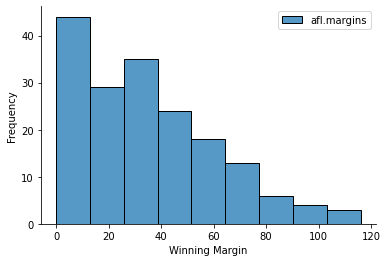

In [3]:

import seaborn as sns

ax = sns.histplot(afl_margins)

ax.set(xlabel ="Winning Margin", 
                ylabel = "Frequency")

sns.despine()

```{glue:figure} afl_fig
:figwidth: 600px
:name: fig-AFL-Margins

A histogram of the AFL 2010 winning margin data (the `afl_margins` variable). As you might expect, the larger the margin the less frequently you tend to see it.
```


(central-tendency)=
## Measures of central tendency

Athough drawing pictures of the data, as I did in {numref}`fig-AFL-Margins` is an excellent way to convey the "gist" of what the data is trying to tell you, it's often extremely useful to try to condense the data into a few simple "summary" statistics. In most situations, the first thing that you'll want to calculate is a measure of **_central tendency_**. That is, you'd like to know something about the "average" or "middle" of your data lies. The two most commonly used measures are the mean, median and mode; occasionally people will also report a trimmed mean. I'll explain each of these in turn, and then discuss when each of them is useful.

### The mean

The **_mean_** of a set of observations is just a normal, old-fashioned average: add all of the values up, and then divide by the total number of values. The first five AFL margins were 56, 31, 56, 8 and 32, so the mean of these observations is just:


$\frac{56 + 31 + 56 + 8 + 32}{5} = \frac{183}{5} = 36.60$


Of course, this definition of the mean isn't news to anyone: averages (i.e., means) are used so often in everyday life that this is pretty familiar stuff. However, since the concept of a mean is something that everyone already understands, I'll use this as an excuse to start introducing some of the mathematical notation that statisticians use to describe this calculation, and talk about how the calculations would be done in Python. 

The first piece of notation to introduce is $N$, which we'll use to refer to the number of observations that we're averaging (in this case $N = 5$). Next, we need to attach a label to the observations themselves. It's traditional to use $X$ for this, and to use subscripts to indicate which observation we're actually talking about. That is, we'll use $X_1$ to refer to the first observation, $X_2$ to refer to the second observation, and so on, all the way up to $X_N$ for the last one. Or, to say the same thing in a slightly more abstract way, we use $X_i$ to refer to the $i$-th observation. Just to make sure we're clear on the notation, the following table lists the 5 observations in the `afl_margins` variable, along with the mathematical symbol used to refer to it, and the actual value that the observation corresponds to:

|the observation        |its symbol |the observed value |
|:----------------------|:----------|:------------------|
|winning margin, game 1 |$X_1$      |56 points          |
|winning margin, game 2 |$X_2$      |31 points          |
|winning margin, game 3 |$X_3$      |56 points          |
|winning margin, game 4 |$X_4$      |8 points           |
|winning margin, game 5 |$X_5$      |32 points          |

Okay, now let's try to write a formula for the mean. By tradition, we use $\bar{X}$ as the notation for the mean. So the calculation for the mean could be expressed using the following formula:  

$\bar{X} = \frac{X_1 + X_2 + ... + X_{N-1} + X_N}{N}$

This formula is entirely correct, but it's terribly long, so we make use of the **_summation symbol_** $\scriptstyle\sum$ to shorten it.[^note2] If I want to add up the first five observations, I could write out the sum the long way, $X_1 + X_2 + X_3 + X_4 +X_5$ or I could use the summation symbol to shorten it to this:  


$\sum_{i=1}^5 X_i$


Taken literally, this could be read as "the sum, taken over all $i$ values from 1 to 5, of the value $X_i$". But basically, what it means is "add up the first five observations". In any case, we can use this notation to write out the formula for the mean, which looks like this:  


$\bar{X} = \frac{1}{N} \sum_{i=1}^N X_i$


In all honesty, I can't imagine that all this mathematical notation helps clarify the concept of the mean at all. In fact, it's really just a fancy way of writing out the same thing I said in words: add all the values up, and then divide by the total number of items. However, that's not really the reason I went into all that detail. My goal was to try to make sure that everyone reading this book is clear on the notation that we'll be using throughout the book: $\bar{X}$ for the mean, $\scriptstyle\sum$ for the idea of summation, $X_i$ for the $i$th observation, and $N$ for the total number of observations. We're going to be re-using these symbols a fair bit, so it's important that you understand them well enough to be able to "read" the equations, and to be able to see that it's just saying "add up lots of things and then divide by another thing".

### Calculating the mean in Python

Okay that's the maths, how do we get the magic computing box to do the work for us? If you really wanted to, you could do this calculation directly in Python. For the first 5 AFL scores, do this just by typing it in as if Python were a calculator...

[^note2]: The choice to use $\Sigma$ to denote summation isn't arbitrary: it's the Greek upper case letter sigma, which is the analogue of the letter S in that alphabet. Similarly, there's an equivalent symbol used to denote the multiplication of lots of numbers: because multiplications are also called "products", we use the $\Pi$ symbol for this; the Greek upper case pi, which is the analogue of the letter P.

In [4]:

(56 + 31 + 56 + 8 + 32) / 5


36.6

... in which case Python outputs the answer 36.6, just as if it were a calculator. However, that's not the only way to do the calculations, and when the number of observations starts to become large, it's easily the most tedious. Besides, in almost every real world scenario, you've already got the actual numbers stored in a variable of some kind, just like we have with the `afl_margins` variable. Under those circumstances, what you want is a function that will just add up all the values stored in a numeric vector. That's what the `sum()` function does. If we want to add up all 176 winning margins in the data set, we can do so using the following command:

In [5]:
margins = afl_margins['afl.margins']

sum(margins)

6213

If we only want the sum of the first five observations, then we can use square brackets to pull out only the first five elements of the vector. So the command would now be:

In [6]:
margins[0:5]

0    56
1    31
2    56
3     8
4    32
Name: afl.margins, dtype: int64

Observant readers will have noticed that to get the first 5 elements we need to ask for elements 0 through 5, which seems to make no sense whatsoever. Python can be weird like that. I am **not** going to get into this here, but I talked about it in the section on [lists](lists) and went into more detail in the section on [slices](slices), and will probably mention it again in the section on [pulling out the contents of a data frame](indexingdataframes). To calculate the mean, we now tell Python to divide the output of this summation by five, so the command that we need to type now becomes the following:

In [7]:
sum(margins[0:5])/5



36.6

Or, we could just ask Python for the mean, without further ado:

In [8]:
margins[0:5].mean()

36.6

Now, as you may remember (you do remember, right?) I spent some time whinging back in [the previous chapter](importinglibraries) about how the Python developers were really mean because they gave us a built-in function for adding but not for averaging, and I made a big deal about how we had to import `statistics.mean`. So why, I hear you ask, can we all of sudden calculate means _without_ importing `statistics.mean`?

As you may have already guessed[^smartiepants], this is because the data we are working with are stored in a [`pandas` dataframe](pandas), which means we are dealing with a different variable type here. We can confirm this, by checking what kind of variable `margins` actually is: 

[^smartiepants]: Or already knew, in which case you are probaby skipping this section and won't read this anyway

In [9]:
type(margins)

pandas.core.series.Series

Ah. `margins` is not a list, or an integer, or any of the other usual suspects. It is a special kind of type that is defined by the `pandas` package, and like all variable types, it has its own set of special [methods](methods) that we can access using the `.` syntax. If you have been following along and entering the code on your own computer, then you can write `dir(margins)`, and you will see that `pandas.core.series.Series` variables have a long list of methods associated with them, and amongst them is both `sum` and `mean`.

If we were to convert `margins` to a different variable type, say, a list, then we could no longer use `.mean()`:

In [10]:
a = list(margins)
a.mean()

AttributeError: 'list' object has no attribute 'mean'

In this case, we would have to take the longer route, by either converting our list `a` to a variable type with a `mean` method, such as a `pandas` series, or by importing `statistics.mean` and using that directly on the list:

In [ ]:
import statistics
statistics.mean(margins)


I said that Python was powerful. I never said it was easy, did I? Don't worry, it gets easier with time[^numb]

[^numb]: Or, perhaps, you just get numb to the pain.

Here's what we would do to calculate the mean for only the first five observations:

In [ ]:
statistics.mean(margins[0:5])

(median)=


### The median

The second measure of central tendency that people use a lot is the **_median_**, and it's even easier to describe than the mean. The median of a set of observations is just the middle value. As before let's imagine we were interested only in the first 5 AFL winning margins: 56, 31, 56, 8 and 32. To figure out the median, we sort these numbers into ascending order:  

$$
8, 31, \mathbf{32}, 56, 56
$$
From inspection, it's obvious that the median value of these 5 observations is 32, since that's the middle one in the sorted list (I've put it in bold to make it even more obvious). Easy stuff. But what should we do if we were interested in the first 6 games rather than the first 5? Since the sixth game in the season had a winning margin of 14 points, our sorted list is now 

$$
8, 14, \mathbf{31}, \mathbf{32}, 56, 56
$$
and there are *two* middle numbers, 31 and 32. The median is defined as the average of those two numbers, which is of course 31.5. As before, it's very tedious to do this by hand when you've got lots of numbers. To illustrate this, here's what happens when you use Python to sort all 176 winning margins. First, I'll use the `sort_values` method to display the winning margins in increasing numerical order. [^note3]

[^note3]: `sort_values` is a *method* that belong to `pandas` *objects*. We'll discuss `pandas` more [later](pandas), and you are already somewhat familiar with the [concept of methods](methods) in Python. For now, the important thing is that it works!

In [ ]:

sorted_margins = afl_margins.sort_values(by = 'afl.margins')
sorted_margins[84:92]


If we peek at the middle of these sorted values, we can see that the middle values are 30 and 31, so the median winning margin for 2010 was 30.5 points. In real life, of course, no-one actually calculates the median by sorting the data and then looking for the middle value. In real life, we use the `median` command[^nomoremethodsnotes]:

[^nomoremethodsnotes]: By now, you are hopefully getting used to the "dot" syntax, where we use a `.` to call an object [method](methods). These distinctions don't really matter so much at this point anyway, so I'm just going to go ahead and start calling things "commands". However, for the sake of thoroughness (or something) I will point out that if your data are not in an object like a `pandas` series that has a built-in `median` method, you can also do `import statistics` and then write `statistics.median(margins)` and get the same result.

In [ ]:
margins.median()

which outputs the median value of 30.5. 


### Mean or median? What's the difference?


```{figure} ../img/descriptives2/meanmedian.png
:name: fig-meanmedian
:width: 600px
:align: center

An illustration of the difference between how the mean and the median should be interpreted. The mean is basically the “centre of gravity” of the data set: if you imagine that the histogram of the data is a solid object, then the point on which you could balance it (as if on a see-saw) is the mean. In contrast, the median is the middle observation. Half of the observations are smaller, and half of the observations are larger.
```

Knowing how to calculate means and medians is only a part of the story. You also need to understand what each one is saying about the data, and what that implies for when you should use each one. This is illustrated in {numref}`fig-meanmedian`. The mean is kind of like the "centre of gravity" of the data set, whereas the median is the "middle value" in the data. What this implies, as far as which one you should use, depends a little on what type of data you've got and what you're trying to achieve. As a rough guide:
 
- If your data are nominal scale, you probably shouldn't be using either the mean or the median. Both the mean and the median rely on the idea that the numbers assigned to values are meaningful. If the numbering scheme is arbitrary, then it's probably best to use the [](mode) instead. 
- If your data are ordinal scale, you're more likely to want to use the median than the mean. The median only makes use of the order information in your data (i.e., which numbers are bigger), but doesn't depend on the precise numbers involved. That's exactly the situation that applies when your data are ordinal scale. The mean, on the other hand, makes use of the precise numeric values assigned to the observations, so it's not really appropriate for ordinal data.
- For interval and ratio scale data, either one is generally acceptable. Which one you pick depends a bit on what you're trying to achieve. The mean has the advantage that it uses all the information in the data (which is useful when you don't have a lot of data), but it's very sensitive to extreme values, as we'll see when we look at [trimmed means](trimmed_mean).  

Let's expand on that last part a little. One consequence is that there's systematic differences between the mean and the median when the histogram is asymmetric (or "skewed": for more detail,  see the section on [skew and kurtosis](skew-and-kurtosis)). This is illustrated in {numref}`fig-meanmedian`, above. Notice that the median (right hand side) is located closer to the "body" of the histogram, whereas the mean (left hand side) gets dragged towards the "tail" (where the extreme values are). To give a concrete example, suppose Bob (income \$50,000), Kate (income \$60,000) and Jane (income \$65,000) are sitting at a table: the average income at the table is \$58,333 and the median income is \$60,000. Then Bill sits down with them (income \$100,000,000). The average income has now jumped to \$25,043,750 but the median rises only to \$62,500. If you're interested in looking at the overall income at the table, the mean might be the right answer; but if you're interested in what counts as a typical income at the table, the median would be a better choice here.

(housingpriceexample)=
### A real life example

To try to get a sense of why you need to pay attention to the differences between the mean and the median, let's consider a real life example. Since I tend to mock journalists for their poor scientific and statistical knowledge, I should give credit where credit is due. This is from an excellent article on the ABC news website [^note4] 24 September, 2010:

>Senior Commonwealth Bank executives have travelled the world in the past couple of weeks with a presentation showing how Australian house prices, and the key price to income ratios, compare favourably with similar countries. "Housing affordability has actually been going sideways for the last five to six years," said Craig James, the chief economist of the bank's trading arm, CommSec.

This probably comes as a huge surprise to anyone with a mortgage, or who wants a mortgage, or pays rent, or isn't completely oblivious to what's been going on in the Australian housing market over the last several years. Back to the article:

>CBA has waged its war against what it believes are housing doomsayers with graphs, numbers and international comparisons. In its presentation, the bank rejects arguments that Australia's housing is relatively expensive compared to incomes. It says Australia's house price to household income ratio of 5.6 in the major cities, and 4.3 nationwide, is comparable to many other developed nations. It says San Francisco and New York have ratios of 7, Auckland's is 6.7, and Vancouver comes in at 9.3.

More excellent news! Except, the article goes on to make the observation that...

>Many analysts say that has led the bank to use misleading figures and comparisons. If you go to page four of CBA's presentation and read the source information at the bottom of the graph and table, you would notice there is an additional source on the international comparison -- Demographia. However, if the Commonwealth Bank had also used Demographia's analysis of Australia's house price to income ratio, it would have come up with a figure closer to 9 rather than 5.6 or 4.3

That's, um, a rather serious discrepancy. One group of people say 9, another says 4-5. Should we just split the difference, and say the truth lies somewhere in between? Absolutely not: this is a situation where there is a right answer and a wrong answer. Demographia are correct, and the Commonwealth Bank is incorrect. As the article points out

>[An] obvious problem with the Commonwealth Bank's domestic price to income figures is they compare average incomes with median house prices (unlike the Demographia figures that compare median incomes to median prices). The median is the mid-point, effectively cutting out the highs and lows, and that means the average is generally higher when it comes to incomes and asset prices, because it includes the earnings of Australia's wealthiest people. To put it another way: the Commonwealth Bank's figures count Ralph Norris' multi-million dollar pay packet on the income side, but not his (no doubt) very expensive house in the property price figures, thus understating the house price to income ratio for middle-income Australians.

Couldn't have put it better myself. The way that Demographia calculated the ratio is the right thing to do. The way that the Bank did it is incorrect. As for why an extremely quantitatively sophisticated organisation such as a major bank made such an elementary mistake, well... I can't say for sure, since I have no special insight into their thinking, but the article itself does happen to mention the following facts, which may or may not be relevant:

>[As] Australia's largest home lender, the Commonwealth Bank has one of the biggest vested interests in house prices rising. It effectively owns a massive swathe of Australian housing as security for its home loans as well as many small business loans.

My, my. 

(trimmed_mean)=
### Trimmed mean 

One of the fundamental rules of applied statistics is that the data are messy. Real life is never simple, and so the data sets that you obtain are never as straightforward as the statistical theory says. [^note5] This can have awkward consequences. To illustrate, consider this rather strange looking data set: 

$$
-100,2,3,4,5,6,7,8,9,10
$$
If you were to observe this in a real life data set, you'd probably suspect that something funny was going on with the $-100$ value. It's probably an **_outlier_**, a value that doesn't really belong with the others. You might consider removing it from the data set entirely, and in this particular case I'd probably agree with that course of action. In real life, however, you don't always get such cut-and-dried examples. For instance, you might get this instead: 

$$
-15,2,3,4,5,6,7,8,9,12
$$
The $-15$ looks a bit suspicious, but not anywhere near as much as that $-100$ did. In this case, it's a little trickier. It *might* be a legitimate observation, it might not.

When faced with a situation where some of the most extreme-valued observations might not be quite trustworthy, the mean is not necessarily a good measure of central tendency. It is highly sensitive to one or two extreme values, and is thus not considered to be a **_robust_** measure. One remedy that we've seen is to use the median. A more general solution is to use a "trimmed mean".  To calculate a trimmed mean, what you do is "discard" the most extreme examples on both ends (i.e., the largest and the smallest), and then take the mean of everything else. The goal is to preserve the best characteristics of the mean and the median: just like a median, you aren't highly influenced by extreme outliers, but like the mean, you "use" more than one of the observations. Generally, we describe a trimmed mean in terms of the percentage of observation on either side that are discarded. So, for instance, a 10% trimmed mean discards the largest 10% of the observations *and* the smallest 10% of the observations, and then takes the mean of the remaining 80% of the observations. Not surprisingly, the 0% trimmed mean is just the regular mean, and the 50% trimmed mean is the median. In that sense, trimmed means provide a whole family of central tendency measures that span the range from the mean to the median.


For our toy example above, we have 10 observations, and so a 10% trimmed mean is calculated by ignoring the largest value (i.e., `12`) and the smallest value (i.e., `-15`) and taking the mean of the remaining values. First, let's enter the data

[^note4]: www.abc.net.au/news/stories/2010/09/24/3021480.htm

[^note5]: Or at least, the basic statistical theory -- these days there is a whole subfield of statistics called *robust statistics* that tries to grapple with the messiness of real data and develop theory that can cope with it.

In [ ]:

dataset = [-15,2,3,4,5,6,7,8,9,12]


Next, let's calculate means and medians. Since our data is now in a regular old list, and not in a dataframe, we can't use the `.mean()` and `.median()` [methods](methods), so we'll just go the old-school route, and `import` our old friend `statistics`:

In [ ]:
import statistics
statistics.mean(dataset)

In [ ]:
statistics.median(dataset)


That's a fairly substantial difference, but I'm tempted to think that the mean is being influenced a bit too much by the extreme values at either end of the data set, especially the $-15$ one. So let's just try trimming the mean a bit. If I take a 10% trimmed mean [^note6], we'll drop the extreme values on either side, and take the mean of the rest: 

[^note6]: Here I use the `stats` function from the `scipy` module. But `stats` is picky: it only wants to deal with data in a certain format called `numpy arrays`. So, to give it what it wants, we also need to import `numpy`, and then convert our data into an `array`. Also, I only imported part of the `scipy` module (you can do that) and renamed the `numpy` module (you can do that too). For a refresher on these technicalities, flip back a few pages to the section on [importing libraries](importinglibraries).

In [ ]:
import numpy as np
from scipy import stats

dataset2 = np.array(dataset)

stats.trim_mean(dataset2, 0.1)


which in this case gives exactly the same answer as the median. Note that, to get a 10% trimmed mean you write `trim = .1`, not `trim = 10`. In any case, let's finish up by calculating the 5% trimmed mean for the `afl_margins` data 

In [ ]:
dataset3 = np.array(margins)
stats.trim_mean(dataset3, 0.05)

(mode)=  
### Mode

The mode of a sample is very simple: it is the value that occurs most frequently. To illustrate the mode using the AFL data, let's examine a different aspect to the data set. Who has played in the most finals? The `afl_finalists` data contains the name of every team that played in any AFL final from 1987-2010, so let's have a look at it. To do this we will use the `head()` method. `head()` is a method that can be used when the data is contained in a `pandas` `dataframe` object (which ours is). It can be useful when you're working with data with a lot of rows, since you can use it to tell you how many rows to return. There have been a lot of finals in this period so printing afl finalists using `print(afl_finalists)` will just fill us the screen. The command below tells Python we just want the first 25 rows of the dataframe.

In [ ]:

afl_finalists.head(n=25)


There are actually 400 entries (aren't you glad we didn't print them all?). We *could* read through all 400, and count the number of occasions on which each team name appears in our list of finalists, thereby producing a **_frequency table_**. However, that would be mindless and boring: exactly the sort of task that computers are great at. So let's use the `value_counts()` method to do this task for us[^onelineortwo]:

[^onelineortwo]: `value_counts()` is a method available to us because our data is in a `pandas` dataframe. In the example below, I have made a new variable called `finalists` which contains the `afl.finalists` column from the `afl_finalists` dataframe. Of course, we could just do `value_counts()` directly on the `pandas` column like this: `afl_finalists['afl.finalists'].value_counts()`. The result is the same.

In [ ]:
finalists = afl_finalists['afl.finalists']
finalists.value_counts()


Now that we have our frequency table, we can just look at it and see that, over the 24 years for which we have data, Geelong has played in more finals than any other team. Thus, the mode of the `finalists` data is `"Geelong"`. If we want to extract the mode without inspecting the table, we can use the `statistics.mode` function to tell us which team has most often played in the finals.

In [ ]:

statistics.mode(finalists)


If we want to find the number of finals they have played in, we can e.g. first extract the frequencies with `value_counts` and then find the largest value with `max`.

In [ ]:
freq = finalists.value_counts()
freq.max()

Taken together, we observe that Geelong (39 finals) played in more finals than any other team during the 1987-2010 period. 

One last point to make with respect to the mode. While it's generally true that the mode is most often calculated when you have nominal scale data (because means and medians are useless for those sorts of variables), there are some situations in which you really do want to know the mode of an ordinal, interval or ratio scale variable. For instance, let's go back to thinking about our `afl_margins` variable. This variable is clearly ratio scale (if it's not clear to you, it may help to re-read [](scales)), and so in most situations the mean or the median is the measure of central tendency that you want. But consider this scenario... a friend of yours is offering a bet. They pick a football game at random, and (without knowing who is playing) you have to guess the *exact* margin. If you guess correctly, you win \$50. If you don't, you lose \$1. There are no consolation prizes for "almost" getting the right answer. You have to guess exactly the right margin. [^note7] For this bet, the mean and the median are completely useless to you. It is the mode that you should bet on. So, we calculate this modal value

[^note7]: This is called a "0-1 loss function", meaning that you either win (1) or you lose (0), with no middle ground.

In [ ]:
statistics.mode(margins)

In [ ]:
freq = margins.value_counts()
freq.max()

So the 2010 data suggest you should bet on a 3 point margin, and since this was observed in 8 of the 176 game (4.5% of games) the odds are firmly in your favour. 

(variability)=

## Measures of variability

The statistics that we've discussed so far all relate to *central tendency*. That is, they all talk about which values are "in the middle" or "popular" in the data. However, central tendency is not the only type of summary statistic that we want to calculate. The second thing that we really want is a measure of the **_variability_** of the data. That is, how "spread out" are the data? How "far" away from the mean or median do the observed values tend to be? For now, let's assume that the data are interval or ratio scale, so we'll continue to use the `afl_margins` data.  We'll use this data to discuss several different measures of spread, each with different strengths and weaknesses. 

(range)=
### Range

The **_range_** of a variable is very simple: it's the biggest value minus the smallest value. For the AFL winning margins data, the maximum value is 116, and the minimum value is 0. We can calculate these values in Python using the `max()` and `min()` functions:


`margins.max()`  
`margins.min()`


where I've omitted the output because it's not interesting.

Although the range is the simplest way to quantify the notion of "variability", it's one of the worst. Recall from our discussion of the mean that we want our summary measure to be robust. If the data set has one or two extremely bad values in it, we'd like our statistics not to be unduly influenced by these cases. If we look once again at our toy example of a data set containing very extreme outliers... 

$$
-100,2,3,4,5,6,7,8,9,10
$$
... it is clear that the range is not robust, since this has a range of 110, but if the outlier were removed we would have a range of only 8.

(iqr)=
### Interquartile range

The **_interquartile range_** (IQR) is like the range, but instead of calculating the difference between the biggest and smallest value, it calculates the difference between the 25th quantile and the 75th quantile. Probably you already know what a **_quantile_** is (they're more commonly called percentiles), but if not: the 10th percentile of a data set is the smallest number $x$ such that 10% of the data is less than $x$. In fact, we've already come across the idea: the median of a data set is its 50th quantile / percentile! The `numpy` module actually provides you with a way of calculating quantiles, using the (surprise, surprise) `quantile()` function. Let's use it to calculate the median AFL winning margin:

In [ ]:

import numpy as np
np.quantile(margins, 0.5)

And not surprisingly, this agrees with the answer that we saw earlier with the `median()` function. Now, we can actually input lots of quantiles at once, by specifying which quantiles we want. So lets do that, and get the 25th and 75th percentile:

In [ ]:

np.quantile(margins, [0.25, .75])


And, by noting that $50.5 - 12.75 = 37.75$, we can see that the interquartile range for the 2010 AFL winning margins data is 37.75. Of course, that seems like too much work to do all that typing, and luckily we don't have to, since the kind folks at `scipy` have already done the work for us and provided us with the  `stats.iqr` function, which will give us what we want.

In [ ]:

from scipy import stats
stats.iqr(margins)


While it's obvious how to interpret the range, it's a little less obvious how to interpret the IQR. The simplest way to think about it is like this: the interquartile range is the range spanned by the "middle half" of the data. That is, one quarter of the data falls below the 25th percentile, one quarter of the data is above the 75th percentile, leaving the "middle half" of the data lying in between the two. And the IQR is the range covered by that middle half.

(aad)=

### Mean absolute deviation

The two measures we've looked at so far, the range and the interquartile range, both rely on the idea that we can measure the spread of the data by looking at the quantiles of the data. However, this isn't the only way to think about the problem. A different approach is to select a meaningful reference point (usually the mean or the median) and then report the "typical" deviations from that reference point. What do we mean by "typical" deviation? Usually, the mean or median value of these deviations! In practice, this leads to two different measures, the "mean absolute deviation (from the mean)" and the "median absolute deviation (from the median)". From what I've read, the measure based on the median seems to be used in statistics, and does seem to be the better of the two, but to be honest I don't think I've seen it used much in psychology. The measure based on the mean does occasionally show up in psychology though. In this section I'll talk about the first one, and I'll come back to talk about the second one later.

Since the previous paragraph might sound a little abstract, let's go through the **_mean absolute deviation_** from the mean a little more slowly. One useful thing about this measure is that the name actually tells you exactly how to calculate it. Let's think about our AFL winning margins data, and once again we'll start by pretending that there's only 5 games in total, with winning margins of 56, 31, 56, 8 and 32. Since our calculations rely on an examination of the deviation from some reference point (in this case the mean), the first thing we need to calculate is the mean, $\bar{X}$. For these five observations, our mean is $\bar{X} = 36.6$. The next step is to convert each of our observations $X_i$ into a deviation score. We do this by calculating the difference between the observation $X_i$ and the mean $\bar{X}$. That is, the deviation score is defined to be $X_i - \bar{X}$. For the first observation in our sample, this is equal to $56 - 36.6 = 19.4$. Okay, that's simple enough. The next step in the process is to convert these deviations to absolute deviations. We do this by converting any negative values to positive ones. Mathematically, we would denote the absolute value of $-3$ as $|-3|$, and so we say that $|-3| = 3$. We use the absolute value function here because we don't really care whether the value is higher than the mean or lower than the mean, we're just interested in how *close* it is to the mean. To help make this process as obvious as possible, the table below shows these calculations for all five observations:

| $i$ (which game)   | $X_i$ (value)    | $X_i - \bar{X}$ (deviation from mean)      |  $\|X_i - \bar{X}\|$ (absolute deviation) |
|--------------|----------|--------------------------|--------------------|
| 1            | 56       | 19.4                     | 19.4               |
| 2            | 31       | -5.6                     | 5.6                |
| 3            | 56       | 19.4                     | 19.4               |
| 4            | 8        | -28.6                    | 28.6               |
| 5            | 32       | -4.6                     |  4.6               |

Now that we have calculated the absolute deviation score for every observation in the data set, all that we have to do to calculate the mean of these scores. Let's do that:

$$

\frac{19.4 + 5.6 + 19.4 + 28.6 + 4.6}{5} = 15.52

$$

And we're done. The mean absolute deviation for these five scores is 15.52. 

However, while our calculations for this little example are at an end, we do have a couple of things left to talk about. First, we should really try to write down a proper mathematical formula. But in order do to this I need some mathematical notation to refer to the mean absolute deviation. Irritatingly, "mean absolute deviation" and "median absolute deviation" have the same acronym (MAD), which leads to a certain amount of ambiguity. To make matters worse, packages that include functions to calculate these things for you _**both use the abbreviation MAD even though they mean different things!**_ Sigh. What I'll do is use AAD instead, short for *average* absolute deviation. Now that we have some unambiguous notation, here's the formula that describes what we just calculated:

$$

ADD\mbox{}(X) = \frac{1}{N} \sum_{i = 1}^N |X_i - \bar{X}|

$$

The last thing we need to talk about is how to calculate AAD in Python. One possibility would be to do everything using low level commands, laboriously following the same steps that I used when describing the calculations above. However, that's pretty tedious. You'd end up with a series of commands that might look like this:

In [ ]:
from statistics import mean

X = [56, 31, 56, 8, 32]             # 1. enter the data
X_bar = mean(X)                     # 2. find the mean of the data
AD = []                             # 3. find the  absolute value of the difference between
for i in X:                         #    each value and the mean and add it to the list AD    
    AD.append(abs((i-X_bar)))       
ADD = mean(AD)                      # 4. find the mean of the absolute values
print(ADD)


Each of those commands is pretty simple, but there's just too many of them. And because I find that to be too much typing, I suggest using the `pandas` method `mad()` to make life easier. There is one important thing to notice, however: `pandas` will want the data to be in a different format, namely the simply and elegantly named `pandas.core.series.Series` format. Haha, just kidding. At least about the simple and elegant name. The format is great, though, and can do lots of things that ordinary lists can't, so it is worth putting up with the name. To find the AAD, we can just do:

In [ ]:
import pandas as pd

data = pd.Series( [56, 31, 56, 8, 32])
data.mad()


Ok, I lied again. There is more than one thing to notice (when isn't there?). `pandas` calls this the "MAD". And, as we have seen, this is _also_ the acronym for the _median absolute difference_. To find the median absolute difference, we can use the `robust` module from the `statsmodels` package, which has a function called, you guessed it, `mad`. Except this time the "m" in "MAD" stand for "median" and not "mean". Haha, isn't naming fun?

We'll talk more about [median absolute deviation](mad) below. For now, just be careful to be aware of which one you are using, and why, and everything will be ok!

In [ ]:
import pandas as pd
import numpy as np
from statsmodels import robust

data = pd.Series( [56, 31, 56, 8, 32])
pandas_mad = data.mad()

data = np.array([56, 31, 56, 8, 32])
statsmodels_mad = robust.mad(data, c = 1)

print("Pandas MAD is the mean absolute deviation:", pandas_mad)
print("Statsmodels MAD is the median absolute deviation:", statsmodels_mad)

(var)=
### Variance 


Although mean absolute deviation measure has its uses, it's not the best measure of variability to use. From a purely mathematical perspective, there are some solid reasons to prefer squared deviations rather than absolute deviations. If we do that, we obtain a measure is called the **_variance_**, which has a lot of really nice statistical properties that I'm going to ignore, [^note8] and one massive psychological flaw that I'm going to make a big deal out of in a moment. The variance of a data set $X$ is sometimes written as $\mbox{Var}(X)$ but it's more commonly denoted $s^2$ (the reason for this will become clearer shortly). The formula that we use to calculate the variance of a set of observations is as follows:

$$
\mbox{Var}(X) = \frac{1}{N} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2
$$


As you can see, it's basically the same formula that we used to calculate the mean absolute deviation, except that instead of using "absolute deviations" we use "squared deviations". It is for this reason that the variance is sometimes referred to as the "mean square deviation".

Now that we've got the basic idea, let's have a look at a concrete example. Once again, let's use the first five AFL games as our data. If we follow the same approach that we took last time, we end up with the following table:

| which game | value | deviation from mean | squared deviation |
| :--------: | :---: | :-----------------: | :---------------: |
|     1      |  56   |        19.4         |      376.36       |
|     2      |  31   |        -5.6         |       31.36       |
|     3      |  56   |        19.4         |      376.36       |
|     4      |   8   |        -28.6        |      817.96       |
|     5      |  32   |        -4.6         |       21.16       |

The same table again, translated into Math-ese, looks like this:

| *i*      | $X_i$ | $X_i - \bar{X}$     | $(X_i - \bar{X}$)$^2$                      |
| :--------: | :---: | :-----------------: | :-----------------------------------------: 
|     1      |  56   |        19.4 &#12644;&#12644;      |      376.36 &#12644;&#12644;|
|     2      |  31   |        -5.6 &#12644;&#12644;        |    31.36  &#12644;&#12644;|
|     3      |  56   |        19.4 &#12644;&#12644;        |    376.36 &#12644;&#12644;|
|     4      |   8   |        -28.6 &#12644;&#12644;       |    817.96 &#12644;&#12644;|
|     5      |  32   |        -4.6 &#12644;&#12644;        |    21.16  &#12644;&#12644;|

That last column contains all of our squared deviations, so all we have to do is average them. If we do that by typing all the numbers into Python by hand...

[^note8]: Well, I will very briefly mention the one that I think is coolest, for a very particular definition of "cool", that is. Variances are *additive*. Here's what that means: suppose I have two variables $X$ and $Y$, whose variances are $\mbox{Var}(X)$ and $\mbox{Var}(Y)$ respectively. Now imagine I want to define a new variable $Z$ that is the sum of the two, $Z = X+Y$. As it turns out, the variance of $Z$ is equal to $\mbox{Var}(X) + \mbox{Var}(Y)$. This is a *very* useful property, but it's not true of the other measures that I talk about in this section.

In [ ]:

( 376.36 + 31.36 + 376.36 + 817.96 + 21.16 ) / 5


... we end up with a variance of 324.64. Exciting, isn't it? For the moment, let's ignore the burning question that you're all probably thinking (i.e., what the heck does a variance of 324.64 actually mean?) and instead talk a bit more about how to do the calculations in Python, because this will reveal something very weird.

As always, we want to avoid having to type in a whole lot of numbers ourselves, and fortunately the `statistics` module provides a function called `variance` which saves us the trouble. And as it happens, we have the values lying around in the variable `data`, which we created in the previous section. With this in mind, we can just calculate the variance of `data` by using the following command

In [ ]:
import statistics

statistics.variance(data)

and you get the same... no, wait... you get a completely different answer. That’s just weird. Is Python broken? Is this a typo? Are Danielle and Ethan idiots?
As it happens, the answer is no[^note9]. It's not a typo, and Python is not making a mistake. To get a feel for what's happening, let's stop using the tiny data set containing only 5 data points, and switch to the full set of 176 games that we've got stored in our  `afl_margins` vector. First, let's calculate the variance by using the formula that I described above:

[^note9]: With the possible exception of the third question.

In [ ]:
import statistics
m = statistics.mean(afl_margins['afl.margins'])  #Find the mean of afl.margins
v = []                                           #Create an empty list
for n in afl_margins['afl.margins']:             #Look at each entry in afl.margins
    squared_error = (n-m)**2                     #Find the squared difference between each item and the mean
    v.append(squared_error)                      #Put each squared in the list v
var = statistics.mean(v)                         #Find the mean of v (mean of the squared errors)
var

Now let's use the `statistics.variance()` function:

In [ ]:
import statistics

var = statistics.variance(afl_margins['afl.margins'])

var

Hm. These two numbers are very similar this time. That seems like too much of a coincidence to be a mistake. And of course it isn't a mistake. In fact, it's very simple to explain what Python is doing here, but slightly trickier to explain *why* Python is doing it. So let's start with the "what". What Python is doing is evaluating a slightly different formula to the one I showed you above. Instead of averaging the squared deviations, which requires you to divide by the number of data points $N$, Python has chosen to divide by $N-1$. In other words, the formula that Python is using is this one 

$$

\frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2

$$

So that's the *what*. The real question is *why* Python is dividing by $N-1$ and not by $N$. After all, the variance is supposed to be the *mean* squared deviation, right? So shouldn't we be dividing by $N$, the actual number of observations in the sample? Well, yes, we should. However, as we'll discuss in the section on [estimation](estimation), there's a subtle distinction between "describing a sample" and "making guesses about the population from which the sample came". Up to this point, it's been a distinction without a difference. Regardless of whether you're describing a sample or drawing inferences about the population, the mean is calculated exactly the same way. Not so for the variance, or the standard deviation, or for many other measures besides. What I outlined to you initially (i.e., take the actual average, and thus dividing by $N$) assumes that you literally intend to calculate the variance of the sample. Most of the time, however, you're not terribly interested in the sample *in and of itself*. Rather, the sample exists to tell you something about the world. If so, you're actually starting to move away from calculating a "sample statistic", and towards the idea of estimating a "population parameter". However, I'm getting ahead of myself. For now, let's just take it on faith that Python knows what it's doing, and we'll revisit the question later on when we talk about [estimation](estimation). 

By the way, if you _do_ want to calculate variance and divide by $N$ and not $N-1$, Python does a have a way to do this as well; you just need to ask for `pvariance()` instead of `variance()`:

In [ ]:
population_variance = statistics.pvariance(afl_margins['afl.margins'])
sample_variance = statistics.variance(afl_margins['afl.margins'])

print("statistics.pvariance divides by N: ", population_variance)
print("statistics.variance divide by N-1: ", sample_variance)

Okay, one last thing. This section so far has read a bit like a mystery novel. I've shown you how to calculate the variance, described the weird "$N-1$" thing that Python does and hinted at the reason why it's there, but I haven't mentioned the single most important thing... how do you *interpret* the variance? Descriptive statistics are supposed to describe things, after all, and right now the variance is really just a gibberish number. Unfortunately, the reason why I haven't given you the human-friendly interpretation of the variance is that there really isn't one. This is the most serious problem with the variance. Although it has some elegant mathematical properties that suggest that it really is a fundamental quantity for expressing variation, it's completely useless if you want to communicate with an actual human... variances are completely uninterpretable in terms of the original variable! All the numbers have been squared, and they don't mean anything anymore. This is a huge issue. For instance, according to the table I presented earlier, the margin in game 1 was "376.36 points-squared higher than the average margin". This is *exactly* as stupid as it sounds; and so when we calculate a variance of 324.64, we're in the same situation. I've watched a lot of footy games, and never has anyone referred to "points squared". It's *not* a real unit of measurement, and since the variance is expressed in terms of this gibberish unit, it is totally meaningless to a human.



(sd)=
### Standard deviation

Okay, suppose that you like the idea of using the variance because of those nice mathematical properties that I haven't talked about, but -- since you're a human and not a robot -- you'd like to have a measure that is expressed in the same units as the data itself (i.e., points, not points-squared). What should you do? The solution to the problem is obvious: take the square root of the variance, known as the **_standard deviation_**, also called the "root mean squared deviation", or RMSD. This solves our problem fairly neatly: while nobody has a clue what "a variance of 324.68 points-squared" really means, it's much easier to understand "a standard deviation of 18.01 points", since it's expressed in the original units. It is traditional to refer to the standard deviation of a sample of data as $s$, though 	"sd" and "std dev." are also used at times. Because the standard deviation is equal to the square root of the variance, you probably won't be surprised to see that the formula is:

$$
s = \sqrt{ \frac{1}{N} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }
$$

and the function that we use to calculate it is `stdev()`. However, as you might have guessed from our discussion of the variance, what Python actually calculates is slightly different to the formula given above. Just like the we saw with the variance, what Python calculates is a version that divides by $N-1$ rather than $N$. For reasons that will make sense when we return to this topic in the chapter on [estimation](estimation), I'll refer to this new quantity as $\hat\sigma$ (read as: "sigma hat"), and the formula for this is 

$$
\hat\sigma = \sqrt{ \frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }
$$

With that in mind, calculating standard deviations in Python is simple:

In [ ]:
statistics.stdev(margins)

Interpreting standard deviations is slightly more complex. Because the standard deviation is derived from the variance, and the variance is a quantity that has little to no meaning that makes sense to us humans, the standard deviation doesn't have a simple interpretation. As a consequence, most of us just rely on a simple rule of thumb: in general, you should expect 68% of the data to fall within 1 standard deviation of the mean, 95% of the data to fall within 2 standard deviation of the mean, and 99.7% of the data to fall within 3 standard deviations of the mean. This rule tends to work pretty well most of the time, but it's not exact: it's actually calculated based on an *assumption* that the histogram is symmetric and "bell shaped". [^note10] As you can tell from looking at the AFL winning margins histogram in {numref}`fig-aflsd`, this isn't exactly true of our data! Even so, the rule is approximately correct. As it turns out, 65.3% of the AFL margins data fall within one standard deviation of the mean. This is shown visually in {numref}`fig-aflsd`.

[^note10]: Strictly, the assumption is that the data are *normally* distributed, which is an important concept that we'll discuss more in the chapter [](probability), and will turn up over and over again later in the book.


```{figure} ../img/descriptives2/figure_2.5_mean_SD.png
:name: fig-aflsd
:width: 600px
:align: center


An illustration of the standard deviation, applied to the AFL winning margins data. The shaded bars in the histogram show how much of the data fall within one standard deviation of the mean. In this case, 65.3% of the data set lies within this range, which is pretty consistent with the \"approximately 68% rule\" discussed in the main text.
```

(mad)=
### Median absolute deviation

The last measure of variability that I want to talk about is the **_median absolute deviation_** (MAD). The basic idea behind MAD is very simple: it's just the median of the absolute deviations from the median of the data. Find the distance of each data point from the median of all the data points (ignoring the signs), and then take the median of that.

This has a straightforward interpretation: every observation in the data set lies some distance away from the typical value (the median). So the MAD is an attempt to describe a *typical deviation from a typical value* in the data set. It wouldn't be unreasonable to interpret the MAD value of 19.5 for our AFL data by saying something like this:

>The median winning margin in 2010 was 30.5, indicating that a typical game involved a winning margin of about 30 points. However, there was a fair amount of variation from game to game: the MAD value was 19.5, indicating that a typical winning margin would differ from this median value by about 19-20 points.

As you'd expect, Python has a method for calculating MAD. It is in the `robust` object from the `statsmodels` package, and you will be shocked no doubt to hear that it's called `mad()`. However, it's a little bit more complicated than the functions that we've been using previously. If you want to use it to calculate MAD in the exact same way that I have described it above, the command that you need to use specifies two arguments: the data set itself `x`, and a `constant` that I'll explain in a moment. For our purposes, the constant is 1, so our command becomes

In [ ]:
import numpy as np
from statsmodels import robust

robust.mad(margins, c=1)

Apart from the weirdness of having to type that `c = 1` part, this is pretty straightforward.

Okay, so what exactly is this `c = 1` argument? I won't go into all the details here, but here's the gist. Although the "raw" MAD value that I've described above is completely interpretable on its own terms, that's not actually how it's used in a lot of real world contexts. Instead, what happens a lot is that the researcher *actually* wants to calculate the standard deviation. However, in the same way that the mean is very sensitive to extreme values, the standard deviation is vulnerable to the exact same issue. So, in much the same way that people sometimes use the median as a "robust" way of calculating "something that is like the mean", it's not uncommon to use MAD as a method for calculating "something that is like the standard deviation". Unfortunately, the *raw* MAD value doesn't do this. Our raw MAD value is 19.5, and our standard deviation was 26.07. However, what some clever person has shown is that, under certain assumptions (the assumption again being that the data are normally-distributed!), you can multiply the raw MAD value by 1.4826 and obtain a number that is directly comparable to the standard deviation. As a consequence, the default value of `constant` is 1.4826, and so when you use the `mad()` command without manually setting a value, here's what you get:

In [ ]:
robust.mad(margins)

I should point out, though, that if you want to use this "corrected" MAD value as a robust version of the standard deviation, you really are relying on the assumption that the data are (or at least, are "supposed to be" in some sense) symmetric and basically shaped like a bell curve. That's really *not* true for our `afl_margins` data, so in this case I wouldn't try to use the MAD value this way.


### Which measure to use?

We've discussed quite a few measures of spread (range, IQR, MAD, variance and standard deviation), and hinted at their strengths and weaknesses. Here's a quick summary:


- [*Range*](range). Gives you the full spread of the data. It's very vulnerable to outliers, and as a consequence it isn't often used unless you have good reasons to care about the extremes in the data.
- [*Interquartile range*](iqr). Tells you where the "middle half" of the data sits. It's pretty robust, and complements the median nicely. This is used a lot.
- [*Mean absolute deviation*](aad). Tells you how far “on average” the observations are from the mean. It’s very interpretable, but has a few minor issues (not discussed here) that make it less attractive to statisticians than the standard deviation. Used sometimes, but not often.
- [*Variance*](var). Tells you the average squared deviation from the mean. It's mathematically elegant, and is probably the "right" way to describe variation around the mean, but it's completely uninterpretable because it doesn't use the same units as the data. Almost never used except as a mathematical tool; but it's buried "under the hood" of a very large number of statistical tools.
- [*Standard deviation*](sd). This is the square root of the variance. It's fairly elegant mathematically, and it's expressed in the same units as the data so it can be interpreted pretty well. In situations where the mean is the measure of central tendency, this is the default. This is by far the most popular measure of variation. 
- [*Median absolute deviation*](mad). The typical (i.e., median) deviation from the median value. In the raw form it's simple and interpretable; in the corrected form it's a robust way to estimate the standard deviation, for some kinds of data sets. Not used very often, but it does get reported sometimes.


In short, the IQR and the standard deviation are easily the two most common measures used to report the variability of the data; but there are situations in which the others are used. I've described all of them in this book because there's a fair chance you'll run into most of these somewhere.

(skew-and-kurtosis)=
## Skew and kurtosis

There are two more descriptive statistics that you will sometimes see reported in the psychological literature, known as skew and kurtosis. In practice, neither one is used anywhere near as frequently as the measures of central tendency and variability that we've been talking about. Skew is pretty important, so you do see it mentioned a fair bit; but I've actually never seen kurtosis reported in a scientific article to date. 

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# load some data
url = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/skewdata.csv'


df_skew = pd.read_csv(url)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NegSkew'], x = 'Values', binwidth = 0.02, ax=axes[0])
ax2 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NoSkew'], x = 'Values', binwidth = 0.02, ax=axes[1])
ax3 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'PosSkew'], x = 'Values', binwidth = 0.02, ax=axes[2])

axes[0].set_title("Negative Skew")
axes[1].set_title("No Skew")
axes[2].set_title("Positive Skew")

for ax in axes:
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)

sns.despine()
    

```{glue:figure} skew_fig
:figwidth: 600px
:name: fig-skew

An illustration of skewness. On the left we have a negatively skewed data set (skewness = -.93), in the middle we have a data set with no skew (technically, skewness = .006), and on the right we have a positively skewed data set (skewness = .93).
```

Since it's the more interesting of the two, let's start by talking about the **_skewness_**. Skewness is basically a measure of asymmetry, and the easiest way to explain it is by drawing some pictures. As {numref}`fig-skew` illustrates, if the data tend to have a lot of extreme small values (i.e., the lower tail is "longer" than the upper tail) and not so many extremely large values (left panel), then we say that the data are *negatively skewed*. On the other hand, if there are more extremely large values than extremely small ones (right panel) we say that the data are *positively skewed*. That's the qualitative idea behind skewness. The actual formula for the skewness of a data set is as follows

$$
\mbox{skewness}(X) = \frac{1}{N \hat{\sigma}^3} \sum_{i=1}^N (X_i - \bar{X})^3
$$

where $N$ is the number of observations, $\bar{X}$ is the sample mean, and $\hat{\sigma}$ is the standard deviation (the "divide by $N-1$" version, that is). Luckily, `pandas`
already knows how to calculate skew:

In [ ]:
margins.skew(axis = 0, skipna = True)

Not surprisingly, it turns out that the AFL winning margins data is fairly skewed.


The final measure that is sometimes referred to, though very rarely in practice, is the **_kurtosis_** of a data set. Put simply, kurtosis is a measure of the "pointiness" of a data set, as illustrated in {numref}`fig-kurtosis`.

In [ ]:
import numpy as np                                                              
import seaborn as sns                                                           
from scipy import stats                                                         
import matplotlib.pyplot as plt

# load some data

file1 = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/kurtosisdata.csv'
file2 = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/kurtosisdata_ncurve.csv'



df_kurtosis = pd.read_csv(file1)

# define a normal distribution with a mean of 0 and a standard deviation of 1
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

platykurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Platykurtic"]
mesokurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Mesokurtic"]
leptokurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Leptokurtic"]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data=platykurtic, x = "Values", binwidth=.5, ax=axes[0])
ax2 = sns.histplot(data=mesokurtic, x = "Values", binwidth=.5,  ax=axes[1])
ax3 = sns.histplot(data=leptokurtic, x = "Values", binwidth=.5, ax=axes[2])



#ax2 = ax.twinx()
sns.lineplot(x=x,y=y*40000, ax=ax1, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax2, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax3, color='black')


axes[0].set_title("Platykurtic\n\"too flat\"")
axes[1].set_title("Mesokurtic\n\"just right\"")
axes[2].set_title("Leptokurtic\n\"too pointy\"")

for ax in axes:
    ax.set_xlim(-6,6)
    ax.set_ylim(0,25000)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)
    

sns.despine()


```{glue:figure} kurtosis_fig
:figwidth: 600px
:name: fig-kurtosis

An illustration of kurtosis. On the left, we have a “platykurtic” data set (kurtosis = -.95), meaning that the data set is “too flat”. In the middle we have a “mesokurtic” data set (kurtosis is almost exactly 0), which means that the pointiness of the data is just about right. Finally, on the right, we have a “leptokurtic” data set (kurtosis = 2.12) indicating that the data set is “too pointy”. Note that kurtosis is measured with respect to a normal curve (black line).
```

By convention, we say that the "normal curve" (black lines) has zero kurtosis, so the pointiness of a data set is assessed relative to this curve. In this Figure, the data on the left are not pointy enough, so the kurtosis is negative and we call the data *platykurtic*. The data on the right are too pointy, so the kurtosis is positive and we say that the data is *leptokurtic*. But the data in the middle are just pointy enough, so we say that it is *mesokurtic* and has kurtosis zero. This is summarised in the table below:

|informal term      |technical name |kurtosis value |
|:------------------|:--------------|:--------------|
|too flat           |platykurtic    |negative       |
|just pointy enough |mesokurtic     |zero           |
|too pointy         |leptokurtic    |positive       |


The equation for kurtosis is pretty similar in spirit to the formulas we've seen already for the variance and the skewness; except that where the variance involved squared deviations and the skewness involved cubed deviations, the kurtosis involves raising the deviations to the fourth power: [^note_kurtosis]

$$
\mbox{kurtosis}(X) = \frac{1}{N \hat\sigma^4} \sum_{i=1}^N \left( X_i - \bar{X} \right)^4  - 3
$$

I know, it's not terribly interesting to me either. To make things worse, there are several different formulae for calculating kurtosis, so different statistics packages may give you different results, depending on which formula they use.  For instance, if we were to do this for the AFL margins, these three different methods give three different results:

[^note_kurtosis]: The "$-3$" part is something that statisticians tack on to ensure that the normal curve has kurtosis zero. It looks a bit stupid, just sticking a "-3" at the end of the formula, but there are good mathematical reasons for doing this.

In [ ]:
print("Pandas: ", margins.kurtosis())
print("Fischer: ",stats.kurtosis(margins, fisher=True))
print("Pearson: ",stats.kurtosis(margins, fisher=False))

Take your pick, I guess? `pandas` actually also calculates Fischer kurtosis, but `stats.kurtosis(margins, fisher=True)` adds a "bias correction" by default, while the `pandas` version doesn't. `stats.kurtosis(margins, fisher=True, bias=False)`will get you the same thing as the `pandas` version. Ugh. If you want to assess the kurtosis of the data, you could probably do worse than just plotting the data and using your eyeballs.

## Getting an overall summary of a variable

Up to this point in the chapter I've explained several different summary statistics that are commonly used when analysing data, along with specific functions that you can use in Python to calculate each one. However, it's kind of annoying to have to separately calculate means, medians, standard deviations, skews etc. Wouldn't it be nice if Python had some helpful functions that would do all these tedious calculations at once? Something that *describes* the data? Maybe something like `describe()`, perhaps? Why yes, yes it would. So much so that this very function exists, available as a method for `pandas` objects.



### "Describing" a variable

The `describe()` method is an easy thing to use, but a tricky thing to understand in full, since it's a generic function. The basic idea behind the `describe()` method is that it prints out some useful information about whatever object (i.e., variable, as far as we're concerned) you ask it to describe. As a consequence, the behaviour of the `describe()` function differs quite dramatically depending on the class of the object that you give it. Let's start by giving it a *numeric* object:

In [ ]:
afl_margins.describe()

For numeric variables, we get a whole bunch of useful descriptive statistics. It gives us the minimum and maximum values (i.e., the range), the first and third quartiles (25th and 75th percentiles; i.e., the IQR), the mean and the median. In other words, it gives us a pretty good collection of descriptive statistics related to the central tendency and the spread of the data.

Okay, what about if we feed it a logical vector instead? Let's say I want to know something about how many "blowouts" there were in the 2010 AFL season. I operationalise the concept of a blowout as a game in which the winning margin exceeds 50 points. Let's create a logical variable `blowouts` in which the $i$-th element is `TRUE` if that game was a blowout according to my definition:

In [ ]:
afl_margins['blowouts'] = np.where(afl_margins['afl.margins'] > 50, True, False)
afl_margins.head()

So that's what the `blowouts` variable looks like. Now let's ask Python to `describe()` this data: 

In [ ]:
afl_margins['blowouts'].describe()

In this context, `describe` gives us the total number of games (176), the number of categories for those games (2, either blowout or not a blowout), the most common category (False, that is, not a blowout), and a count for the more common category. A little cryptic, but not entirely unreasonable. 



### "Describing" a data frame

Okay what about data frames? When you `describe()` a dataframe, it produces a slightly condensed summary of each variable inside the data frame (as long as you specify that you want `'all'` the variables). To give you a sense of how this can be useful, let's try this for a new data set, one that you've never seen before. The data is stored in the `clinical_trial_data.csv` file, and we'll use it a lot in a [later chapter](ANOVA) when we discuss analysis of variance (you can find a complete description of the data at the start of that chapter). Let's load it, and see what we've got:

In [ ]:
import pandas as pd
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/clinical_trial_data.csv'

df_clintrial = pd.read_csv(file)
df_clintrial.head()



Our dataframe `df_clintrial` contains three variables, `drug`, `therapy` and `mood_gain`. Presumably then, this data is from a clinical trial of some kind, in which people were administered different drugs, and the researchers looked to see what the drugs did to their mood. Let's see if the `describe()` function sheds a little more light on this situation:

In [ ]:
df_clintrial.describe(include = 'all')

If we want to `describe` the entire dataframe, we need to add the argument  `include = 'all'`. This gives us information on all of the of columns, but this is still rather limited. I mean, I guess I learned something about this data, but if we want to really understand these data, we will have to use other tools to investigate them. That is what the rest of this book is about.


(zcores)=
## Standard scores


Suppose my friend is putting together a new questionnaire intended to measure "grumpiness". The survey has 50 questions, which you can answer in a grumpy way or not. Across a big sample (hypothetically, let's imagine a million people or so!) the data are fairly normally distributed, with the mean grumpiness score being 17 out of 50 questions answered in a grumpy way, and the standard deviation is 5. In contrast, when I take the questionnaire, I answer 35 out of 50 questions in a grumpy way. So, how grumpy am I? One way to think about it would be to say that I have grumpiness of 35/50, so you might say that I'm 70% grumpy. But that's a bit weird, when you think about it. If my friend had phrased her questions a bit differently, people might have answered them in a different way, so the overall distribution of answers could easily move up or down depending on the precise way in which the questions were asked. So, I'm only 70% grumpy *with respect to this set of survey questions*. Even if it's a very good questionnaire, this isn't very a informative statement. 

A simpler way around this is to describe my grumpiness by comparing me to other people. Shockingly, out of my friend's sample of 1,000,000 people, only 159 people were as grumpy as me (that's not at all unrealistic, frankly), suggesting that I'm in the top 0.016% of people for grumpiness. This makes much more sense than trying to interpret the raw data. This idea -- that we should describe my grumpiness in terms of the overall distribution of the grumpiness of humans -- is the qualitative idea that standardisation attempts to get at. One way to do this is to do exactly what I just did, and describe everything in terms of percentiles. However, the problem with doing this is that "it's lonely at the top". Suppose that my friend had only collected a sample of 1000 people (still a pretty big sample for the purposes of testing a new questionnaire, I'd like to add), and this time gotten a mean of 16 out of 50 with a standard deviation of 5, let's say. The problem is that almost certainly, not a single person in that sample would be as grumpy as me.


However, all is not lost. A different approach is to convert my grumpiness score into a **_standard score_**, also referred to as a $z$-score. The standard score is defined as the number of standard deviations above the mean that my grumpiness score lies. To phrase it in "pseudo-maths" the standard score is calculated like this:

$$
\mbox{standard score} = \frac{\mbox{raw score} - \mbox{mean}}{\mbox{standard deviation}}
$$ 

In actual maths, the equation for the $z$-score is

$$
z_i = \frac{X_i - \bar{X}}{\hat\sigma}
$$

So, going back to the grumpiness data, we can now transform Dan's raw grumpiness into a standardised grumpiness score. I haven't discussed how to compute $z$-scores, explicitly, but you can probably guess. For a dataset d, an easy way to find a z-score is to import `stats` from `scipy` and then do: `stats.zscore(d)`. If the mean is 17 and the standard deviation is 5 then my standardised grumpiness score would be 

$$
z = \frac{35 - 17}{5} = 3.6
$$

Technically, because I'm calculating means and standard deviations from a sample of data, but want to talk about my grumpiness relative to a population, what I'm actually doing is *estimating* a $z$ score. However, since we haven't talked about [estimation](estimation)  yet  I think it's best to ignore this subtlety, especially as it makes very little difference to our calculations.

To interpret this value, recall the rough heuristic that I provided in the section on [standard deviation](sd), in which I noted that 99.7% of values are expected to lie within 3 standard deviations of the mean. So the fact that my grumpiness corresponds to a $z$ score of 3.6 indicates that I'm very grumpy indeed. 

In addition to allowing you to interpret a raw score in relation to a larger population (and thereby allowing you to make sense of variables that lie on arbitrary scales), standard scores serve a second useful function. Standard scores can be compared to one another in situations where the raw scores can't. Suppose, for instance, my friend also had another questionnaire that measured extraversion using a 24 items questionnaire. The overall mean for this measure turns out to be 13 with standard deviation 4, and I scored a 2. As you can imagine, it doesn't make a lot of sense to try to compare my raw score of 2 on the extraversion questionnaire to my raw score of 35 on the grumpiness questionnaire. The raw scores for the two variables are "about" fundamentally different things, so this would be like comparing apples to oranges.

What about the standard scores? Well, this is a little different. If we calculate the standard scores, we get $z = (35-17)/5 = 3.6$ for grumpiness and $z = (2-13)/4 = -2.75$ for extraversion. These two numbers *can* be compared to each other. [^note11]  I'm much less extraverted than most people ($z = -2.75$) and much grumpier than most people ($z = 3.6$): but the extent of my unusualness is much more extreme for grumpiness (since 3.6 is a bigger number than 2.75).  Because each standardised score is a statement about where an observation falls *relative to its own population*, it *is* possible to compare standardised scores across completely different variables. 

[^note11]: Though some caution is usually warranted. It's not always the case that one standard deviation on variable A corresponds to the same "kind" of thing as one standard deviation on variable B. Use common sense when trying to determine whether or not the $z$ scores of two variables can be meaningfully compared.

(correlations)=
## Correlations

Up to this point we have focused entirely on how to construct descriptive statistics for a single variable. What we haven't done is talked about how to describe the relationships *between* variables in the data. To do that, we want to talk mostly about the **_correlation_** between variables. But first, we need some data.

### The data 

After spending so much time looking at the AFL data, I'm starting to get bored with sports. Instead, let's turn to a topic close to every parent's heart: sleep. The following data set is fictitious, but based on real events. Suppose I'm curious to find out how much my infant son's sleeping habits affect my mood. Let's say that I can rate my grumpiness very precisely, on a scale from 0 (not at all grumpy) to 100 (grumpy as a very, very grumpy old man). And, lets also assume that I've been measuring my grumpiness, my sleeping patterns and my son's sleeping patterns for quite some time now. Let's say, for 100 days. And, being a nerd, I've saved the data as a file called `parenthood.csv`. If we load the data...

In [ ]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
parenthood = pd.read_csv(file)

parenthood.head()


... we see that the file contains a single data frame called `parenthood`, which contains four variables `dan_sleep`, `baby_sleep`, `dan_grump` and `day`. Next, I'll calculate some basic descriptive statistics:

In [ ]:
parenthood.describe()

Finally, to give a graphical depiction of what each of the three interesting variables looks like, {numref}`fig-grump` plots histograms. 



In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

dan_grump = parenthood['dan_grump']
dan_sleep = parenthood['dan_sleep']
baby_sleep = parenthood['baby_sleep']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sleep Data')

# My grumpiness
sns.histplot(dan_grump, ax=axes[0])
axes[0].set_title(dan_grump.name)

# My sleep
sns.histplot(dan_sleep, ax=axes[1])
axes[1].set_title(dan_sleep.name)

# Baby's sleep
sns.histplot(baby_sleep, ax=axes[2])
axes[2].set_title(baby_sleep.name);

for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)
    
sns.despine()


```{glue:figure} grump_fig
:figwidth: 650px
:name: fig-grump

Histograms for the three interesting variables in the parenthood data set.
```

One thing to note: just because Python can calculate dozens of different statistics doesn't mean you should report all of them. If I were writing this up for a report, I'd probably pick out those statistics that are of most interest to me (and to my readership), and then put them into a nice, simple table like the one in the table below. [^note12] Notice that when I put it into a table, I gave everything "human readable" names. This is always good practice. Notice also that I'm not getting enough sleep. This isn't good practice, but other parents tell me that it's standard practice.  

|variable                |min  |max   |mean  |median |std. dev |IQR  |
|:-----------------------|:----|:-----|:-----|:------|:--------|:----|
|Dan's grumpiness        |41   |91    |63.71 |62     |10.05    |14   |
|Dan's hours slept       |4.84 |9     |6.97  |7.03   |1.02     |1.45 |
|Dan's son's hours slept |3.25 |12.07 |8.05  |7.95   |2.07     |3.21 |

[^note12]: Actually, even that table is more than I'd bother with. In practice most people pick *one* measure of central tendency, and *one* measure of variability only.

(correlation)=

### The strength and direction of a relationship


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Sleepy, grumpy scatterplots')

sns.scatterplot(x = dan_sleep, y = dan_grump, ax = axes[0])
fig.axes[0].set_title("Dan")
fig.axes[0].set_xlabel("Sleep")
fig.axes[0].set_ylabel("My grumpiness")

sns.scatterplot(x = baby_sleep, y = dan_grump, ax = axes[1])
fig.axes[1].set_title("Baby")
fig.axes[1].set_xlabel("Sleep")
fig.axes[1].set_ylabel("My grumpiness")

sns.despine()

```{glue:figure} sleep_scatter_fig1
:figwidth: 600px
:name: fig-sleep_scatter1

Scatterplots showing the relationship between dan.sleep and dan.grump (left) and the rela-
tionship between baby.sleep and dan.grump (right).
```

We can draw scatterplots to give us a general sense of how closely related two variables are. Ideally though, we might want to say a bit more about it than that. For instance, let's compare the relationship between `dan_sleep` and `dan_grump` with that between `baby_sleep` and `dan_grump` {numref}`fig-sleep_scatter1`. When looking at these two plots side by side, it's clear that the relationship is *qualitatively* the same in both cases: more sleep equals less grump! However, it's also pretty obvious that the relationship between `dan_sleep` and `dan_grump` is *stronger* than the relationship between `baby_sleep` and `dan_grump`. The plot on the left is "neater" than the one on the right. What it feels like is that if you want to predict what my mood is, it'd help you a little bit to know how many hours my son slept, but it'd be *more* helpful to know how many hours I slept. 

In contrast, let's consider {numref}`fig-sleep_scatter2`. If we compare the scatterplot of "`baby_sleep` v `dan_grump`" to the scatterplot of `baby_sleep` v `dan_sleep`, the overall strength of the relationship is the same, but the direction is different. That is, if my son sleeps more, I get *more* sleep (positive relationship, but if he sleeps more then I get *less* grumpy (negative relationship).

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False) # y axes are now on different scales, so sharey=False
fig.suptitle('Sleepier, grumpier scatterplots')

sns.scatterplot(x = dan_sleep, y = dan_grump, ax = axes[0])
fig.axes[0].set_xlabel("Baby's sleep")
fig.axes[0].set_ylabel("My grumpiness")

sns.scatterplot(x = baby_sleep, y = dan_sleep, ax = axes[1])
fig.axes[1].set_xlabel("Baby's sleep")
fig.axes[1].set_ylabel("My sleep")

sns.despine()
#glue("sleep_scatter-fig2", fig, display=False)

```{glue:figure} sleep_scatter_fig2
:figwidth: 600px
:name: fig-sleep_scatter2

Scatterplots showing the relationship between baby_sleep and dan_grump (left), as compared
to the relationship between baby.sleep and dan.sleep (right).
```

### The correlation coefficient

We can make these ideas a bit more explicit by introducing the idea of a **_correlation coefficient_** (or, more specifically, Pearson's correlation coefficient), which is traditionally denoted by $r$. The correlation coefficient between two variables $X$ and $Y$ (sometimes denoted $r_{XY}$), which we'll define more precisely in the next section, is a measure that varies from $-1$ to $1$. When $r = -1$ it means that we have a perfect negative relationship, and when $r = 1$ it means we have a perfect positive relationship. When $r = 0$, there's no relationship at all. If you look at {numref}`fig-corrs`, you can see several plots showing what different correlations look like.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

mean = [0, 0]
cov = [[1, 0], [0, 1]]
r = [0, .33, .66, 1]
rneg = [0, -.33, -.66, -1]

fig, axes = plt.subplots(4, 2, figsize=(15, 15), sharey=False)

for s, val in enumerate(r):
    cov = [[1, val], [val, 1]]
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    sns.scatterplot(x=x,y=y, ax = axes[s,0])
    axes[s,0].set_title('r = ' + str(val))

for s, val in enumerate(rneg):
    cov = [[1, val], [val, 1]]
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    sns.scatterplot(x=x,y=y, ax = axes[s,1])
    axes[s,1].set_title('r = ' + str(val))


sns.despine()
    
#glue("corrs-fig", fig, display=False)

```{glue:figure} corrs-fig
:figwidth: 600px
:name: fig-corrs

Illustration of the effect of varying the strength and direction of a correlation. In the left hand column, the correlations are 0, .33, .66 and 1. In the right hand column, the correlations are 0, -.33, -.66 and -1.
```

The formula for the Pearson's correlation coefficient can be written in several different ways. I think the simplest way to write down the formula is to break it into two steps. Firstly, let's introduce the idea of a **_covariance_**. The covariance between two variables $X$ and $Y$ is a generalisation of the notion of the variance; it's a mathematically simple way of describing the relationship between two variables that isn't terribly informative to humans:

$$
\mbox{Cov}(X,Y) = \frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right) \left( Y_i - \bar{Y} \right)
$$

Because we're multiplying (i.e., taking the "product" of) a quantity that depends on $X$ by a quantity that depends on $Y$ and then averaging [^note_covariance], you can think of the formula for the covariance as an "average cross product" between $X$ and $Y$. The covariance has the nice property that, if $X$ and $Y$ are entirely unrelated, then the covariance is exactly zero. If the relationship between them is positive (in the sense shown in {numref}`fig-corrs` then the covariance is also positive; and if the relationship is negative then the covariance is also negative. In other words, the covariance captures the basic qualitative idea of correlation. Unfortunately, the raw magnitude of the covariance isn't easy to interpret: it depends on the units in which $X$ and $Y$ are expressed, and worse yet, the actual units that the covariance itself is expressed in are really weird. For instance, if $X$ refers to the `dan_sleep` variable (units: hours) and $Y$ refers to the `dan_grump` variable (units: grumps), then the units for their covariance are "hours $\times$ grumps". And I have no freaking idea what that would even mean. 

The Pearson correlation coefficient $r$ fixes this interpretation problem by standardising the covariance, in pretty much the exact same way that the $z$-score standardises a raw score: by dividing by the standard deviation. However, because we have two variables that contribute to the covariance, the standardisation only works if we divide by both standard deviations (this is an oversimplification, but it'll do for our purposes)  In other words, the correlation between $X$ and $Y$ can be written as follows:

$$
r_{XY}  = \frac{\mbox{Cov}(X,Y)}{ \hat{\sigma}_X \ \hat{\sigma}_Y}
$$

By doing this standardisation, not only do we keep all of the nice properties of the covariance discussed earlier, but the actual values of $r$ are on a meaningful scale: $r= 1$ implies a perfect positive relationship, and $r = -1$ implies a perfect negative relationship. I'll expand a little more on this point later, in section on [interpreting correlations](interpreting-correlations). But before I do, let's look at how to calculate correlations in Python.

[^note_covariance]: Just like we saw with the variance and the standard deviation, in practice we divide by $N-1$ rather than $N$.

### Calculating correlations in Python



Calculating correlations in Python can be done using the `corr()` method. The simplest way to use the command is to specify two input arguments `x` and `y`, each one corresponding to one of the variables. The following extract illustrates the basic usage of the function: [^note13] 

[^note13]: If you are reading this after having already completed the chapter on [hypothesis testing](hypothesis-testing) you might be wondering about hypothesis tests for correlations. This can be done with `pingouin.corr` (or `scipy.stats.pearsonr`, or `scipy.stats.spearmanr`).


In [ ]:
x = parenthood['dan_sleep']
y = parenthood['dan_grump']

In [ ]:
x.corr(y)

However, the `corr()` function is a bit more powerful than this simple example suggests. For example, you can also calculate a complete "correlation matrix", between all pairs of variables in the data frame:

In [ ]:
parenthood.corr()

(interpreting-correlations)=
### Interpreting a correlation
 
Naturally, in real life you don't see many correlations of 1. So how should you interpret a correlation of, say $r= .4$? The honest answer is that it really depends on what you want to use the data for, and on how strong the correlations in your field tend to be. A  friend of mine in engineering once argued that any correlation less than $.95$ is completely useless (I think he was exaggerating, even for engineering). On the other hand there are real cases -- even in psychology -- where you should really expect correlations that strong. For instance, one of the benchmark data sets used to test theories of how people judge similarities is so clean that any theory that can't achieve a correlation of at least $.9$ really isn't deemed to be successful. However, when looking for (say) elementary correlates of intelligence (e.g., inspection time, response time), if you get a correlation above $.3$ you're doing very very well. In short, the interpretation of a correlation depends a lot on the context. That said, the rough guide in {numref}`table-corr-interpretation` is pretty typical.

In [ ]:
correlation = ["-1.0 to -0.9", "-0.9 to -0.7", "-0.7 to -0.4", 
                    "-0.4 to -0.2", "-0.2 to 0", "0 to 0.2 ", "0.2 to 0.4",
                    ".4 to 0.7", "0.7 to 0.9", "0.9 to 1.0"]
strength = ["Very strong", "Strong", "Moderate", "Weak", "Negligible", "Negligible", "Weak",
           "Moderate", "Strong", "Very strong"]
direction = ["Negative"]*5 + ["Positive"]*5
df = pd.DataFrame(
    {'Correlation': correlation,
     'Strength': strength,
     'Direction': direction
    }) 
df.style.hide(axis='index')
#glue("corr-interpretation-table", df, display=True)

```{glue:figure} corr-interpretation-table
:figwidth: 600px
:name: table-corr-interpretation

A rough guide to interpreting correlations. Note that I say a rough guide. There aren’t hard and fast rules for what counts as strong or weak relationships. It depends on the context.
```

However, something that can never be stressed enough is that you should *always* look at the scatterplot before attaching any interpretation to the data. A correlation might not mean what you think it means. The classic illustration of this is "Anscombe's Quartet"  {cite}`Anscombe1973`, which is a collection of four data sets. Each data set has two variables, an $X$ and a $Y$. For all four data sets the mean value for $X$ is 9 and the mean for $Y$ is 7.5. The, standard deviations for all $X$ variables are almost identical, as are those for the the $Y$ variables. And in each case the correlation between $X$ and $Y$ is $r = 0.816$. You can verify this yourself, like this:

In [ ]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

df = pd.DataFrame(
    {'x': x,
     'y1': y1,
     'y2': y2,
     'y3': y3,
     'x4': x4,
     'y4': y4
    })

print(df['x'].corr(df['y1']))
print(df['x'].corr(df['y2']))
print(df['x'].corr(df['y3']))
print(df['x4'].corr(df['y4']))

and so on. 

You'd think that these four data sets would look pretty similar to one another. They do not. If we draw scatterplots of $X$ against $Y$ for all four variables, as shown in {numref}`fig-anscombe` we see that all four of these are *spectacularly* different to each other. 

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Anscombe\'s quartet')

sns.scatterplot(x = df['x'], y = df['y1'], ax = axes[0,0])
sns.scatterplot(x = df['x'], y = df['y2'], ax = axes[0,1])
sns.scatterplot(x = df['x'], y = df['y3'], ax = axes[1,0])
sns.scatterplot(x = df['x4'], y = df['y4'], ax = axes[1,1])

sns.despine()

#glue("anscombe-fig", fig, display=False)

```{glue:figure} anscombe-fig
:figwidth: 600px
:name: fig-anscombe

Anscombe’s quartet. All four of these data sets have a Pearson correlation of r “ .816, but they are qualitatively different from one another.
```

The lesson here, which so very many people seem to forget in real life is "*always graph your raw data*". This will be the focus of the chapter on [](DrawingGraphs).


The Pearson correlation coefficient is useful for a lot of things, but it does have shortcomings. One issue in particular stands out: what it actually measures is the strength of the *linear* relationship between two variables. In other words, what it gives you is a measure of the extent to which the data all tend to fall on a single, perfectly straight line. Often, this is a pretty good approximation to what we mean when we say "relationship", and so the Pearson correlation is a good thing to calculation. Sometimes, it isn't. 

One very common situation where the Pearson correlation isn't quite the right thing to use arises when an increase in one variable $X$ really is reflected in an increase in another variable $Y$, but the nature of the relationship isn't necessarily linear. An example of this might be the relationship between effort and reward when studying for an exam. If you put in zero effort ($X$) into learning a subject, then you should expect a grade of 0% ($Y$). However, a little bit of effort will cause a *massive* improvement: just turning up to lectures means that you learn a fair bit, and if you just turn up to classes, and scribble a few things down so your grade might rise to 35%, all without a lot of effort. However, you just don't get the same effect at the other end of the scale. As everyone knows, it takes *a lot* more effort to get a grade of 90% than it takes to get a grade of 55%. What this means is that, if I've got data looking at study effort and grades, there's a pretty good chance that Pearson correlations will be misleading. 


To illustrate, consider the data plotted in {numref}`fig-rankcorr`, showing the relationship between hours worked and grade received for 10 students taking some class. The curious thing about this -- highly fictitious -- data set is that increasing your effort *always* increases your grade. It might be by a lot or it might be by a little, but increasing effort will never decrease your grade. The data are stored in `effort.csv`:

In [ ]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/effort.csv'

effort = pd.read_csv(file)

effort

If we run a standard Pearson correlation, it shows a strong relationship between hours worked and grade received,

In [ ]:
effort['hours'].corr(effort['grade'])

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()
sns.regplot(x='hours', y='grade', data=effort, ci=None, ax=ax)
sns.lineplot(x='hours', y='grade', data=effort, color = "black", ci=None, ax=ax)
ax.lines[0].set_linestyle("--")

sns.despine()

#glue("rankcorr-fig", fig, display=False)

```{glue:figure} rankcorr-fig
:figwidth: 600px
:name: fig-rankcorr

The relationship between hours worked and grade received, for a toy data set consisting of only 10 students (each dot corresponds to one student). The dashed line through the middle shows the linear relationship between the two variables. This produces a strong Pearson correlation of $r = .91$. However, the interesting thing to note here is that there's actually a perfect monotonic relationship between the two variables: in this toy example at least, increasing the hours worked always increases the grade received, as illustrated by the solid line. This is reflected in a Spearman correlation of $rho = 1$. With such a small data set, however, it's an open question as to which version better describes the actual relationship involved.
```


but this doesn't actually capture the observation that increasing hours worked *always* increases the grade. There's a sense here in which we want to be able to say that the correlation is *perfect* but for a somewhat different notion of what a "relationship" is. What we're looking for is something that captures the fact that there is a perfect **_ordinal relationship_** here. That is, if student 1 works more hours than student 2, then we can guarantee that student 1 will get the better grade. That's not what a correlation of $r = .91$ says at all.

How should we address this? Actually, it's really easy: if we're looking for ordinal relationships, all we have to do is treat the data as if it were ordinal scale! So, instead of measuring effort in terms of "hours worked", lets rank all 10 of our students in order of hours worked. That is, student 1 did the least work out of anyone (2 hours) so they get the lowest rank (rank = 1). Student 4 was the next laziest, putting in only  6 hours of work in over the whole semester, so they get the next lowest rank (rank = 2). Notice that I'm using "rank = 1" to mean "low rank". Sometimes in everyday language we talk about "rank = 1" to mean "top rank" rather than "bottom rank". So be careful: you can rank "from smallest value to largest value" (i.e., small equals rank 1) or you can rank "from largest value to smallest value" (i.e., large equals rank 1). In this case, I'm ranking from smallest to largest, because that is how Python does it. But in real life, it's really easy to forget which way you set things up, so you have to put a bit of effort into remembering! 

Okay, so let's have a look at our students when we rank them from worst to best in terms of effort and reward: 


|            | rank (hours worked) | rank (grade received) |
| :--------: | :-----------------: | :-------------------: |
| student 1  |          1          |           1           |
| student 2  |         10          |          10           |
| student 3  |          6          |           6           |
| student 4  |          2          |           2           |
| student 5  |          3          |           3           |
| student 6  |          5          |           5           |
| student 7  |          4          |           4           |
| student 8  |          8          |           8           |
| student 9  |          7          |           7           |
| student 10 |          9          |           9           |


Hm. These are *identical*. The student who put in the most effort got the best grade, the student with the least effort got the worst grade, etc. We can get Python to construct new variables with these rankings using the `rank()` method, and specifiying which columns in our dataframe we want to rank, like this:

In [ ]:
ranked_hours = effort['hours'].rank()
ranked_grades = effort['grade'].rank()

As the table above shows, these two rankings are identical, so if we now correlate them we get a perfect relationship:

In [ ]:
ranked_hours.corr(ranked_grades)

What we've just re-invented is **_Spearman's rank order correlation_**, usually denoted $\rho$ to distinguish it from the Pearson correlation $r$. We can calculate Spearman's $\rho$ using R in two different ways. Firstly we could do it the way I just showed, using the `rank()` function to construct the rankings, and then calculate the Pearson correlation on these ranks. However, that's way too much effort to do every time. It's much easier to just specify the `method` argument of the `corr()` method. [^note14] Since we are skipping the extra step of "manually" creating new, ranked variables, we can just operate directly on the dataframe columns:

[^note14]: Yikes, that's two uses of the word method, and they mean different things. Sigh. Language is hard, and things get confusing when code-switching between human language and computer language!

In [ ]:
effort['hours'].corr(effort['grade'], method="spearman")

The default value of the `method` argument is `"pearson"`, which is why we didn't have to specify it earlier on when we were doing Pearson correlations, although we could have, for extra clarity. 

(missing)=
## Handling missing values

There's one last topic that I want to discuss briefly in this chapter, and that's the issue of **_missing data_**. Real data sets very frequently turn out to have missing values: perhaps someone forgot to fill in a particular survey question, for instance. Missing data can be the source of a lot of tricky issues, most of which I'm going to gloss over. However, at a minimum, you need to understand the basics of handling missing data in Python. 


### The single variable case

Let's start with the simplest case, in which you're trying to calculate descriptive statistics for a single variable which has missing data. In Python, this means that there will be `nan` ("not a number") values in your data vector. Let's create a variable like that:

In [1]:
partial = [10, 20, float('nan'), 30]

Let's assume that you want to calculate the mean of this variable. By default, Python assumes that you want to calculate the mean using all four elements of this vector, which is probably the safest thing for a dumb automaton to do, but it's rarely what you actually want. Why not? Well, remember that although `nan` stands for "not a number", the more accurate interpretation of `nan` here is "There should be a number here, but I don't know what that number is". This means that `1 + nan = nan`: if I add 1 to some number that I don't know (i.e., the `nan`) then the answer is *also* a number that I don't know. As a consequence, if you don't explicitly tell Python to ignore the `nan` values, and the data set does have missing values, then the output will itself be a missing value. If I try to calculate the mean of the `partial` vector, without doing anything about the missing value, here's what happens:

In [2]:
statistics.mean(partial)

NameError: name 'statistics' is not defined

Technically correct, but deeply unhelpful. There are a few ways to deal with this. The first is to use methods from `numpy`. `numpy` has a collection of methods to calculate nan-friendly versions of your favorite descriptive statistics (although correlation is a special case, more on that below), such as `nanmean`, `nanmedian`, `nanpercentile`, `nanmax`, `nanmin`, `nansum`, `nanstd`, etc. So:

In [3]:
import numpy as np


print(np.nanmean(partial))

print(np.nanmedian(partial))

print(np.nanstd(partial))


20.0
20.0
8.16496580927726


This is great! Now we can get the descriptive statistics we want, without those pesky `nan`s getting in the way. Still, it is a little tedious to need to remember to to use the `np.nan` version of these functions when dealing with data containing `nan`s (which real data sets often do). As a bit of a consolation, `pandas` dataframes can already calculate these statistics for us, and ignore `nan`s by default. So, if we put our data in a `pandas` dataframe, we don't need to worry about it:

In [4]:
import pandas as pd

df = pd.DataFrame(
    {'var1': partial,
     'var2': [10, float('nan'), float('nan'), 35],
     'var3': [float('nan'), 12, 18, 27]
    }) 

df

,var1,var2,var3
0,10.0,10.0,NaN
1,20.0,NaN,12.0
2,NaN,NaN,18.0
3,30.0,35.0,27.0


In [5]:
print(df['var1'].mean())
print(df['var1'].median())
print(df['var1'].std())

20.0
20.0
10.0


This is also great, but there is one little niggling problem. `var1` in our dataframe is the same as the `partial` variable we defined earlier. The mean and median values look the same as when we used the `numpy` methods, but the standard deviation is little bit different. What's up with that? As it turns out, `numpy` and `pandas` calculate standard deviation in slightly different ways: `numpy` uses $N$ in the demoninator, while `pandas` uses the "unbiased estimator" $N-1$ in the demoniator. To make `numpy` behave like `pandas`, we need to pass the `ddof=1` argument to `nanmean()`, like so:

In [6]:
print(df['var1'].std())
print(np.nanstd(partial, ddof=1))

10.0
10.0


and all is well! 

Notice that the mean is `20`  (i.e., `60 / 3`) and *not* `15`. When Python ignores an `nan` value, it genuinely ignores it. In effect, the calculation above is identical to what you'd get if you asked for the mean of the three-element vector `[10, 20, 30]`. This is also why the mean and the median are the same in this case.


### Missing values in pairwise calculations

I mentioned earlier that correlation is a special case. It doesn't have an `np.nancorr` argument, because the story becomes a lot more complicated when more than one variable is involved. To explore this, lets look at the data in `parenthood2.csv`. This is just like the `parenthood` data from before, but with some missing values introducd. Maybe I was just too tired some mornings to record the baby's hours of sleep, or to measure my own grumpiness. It happens.

In [9]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood2.csv'

parenthood2 = pd.read_csv(file)
parenthood2.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,NaN,56.0,1
1,7.91,11.66,60.0,2
2,5.14,7.92,82.0,3
3,7.71,9.61,55.0,4
4,6.68,9.75,NaN,5


We can see some of those pesky `nan`s right in the first 5 rows, and if we `describe()` our data, we can get a feeling for how many there are:

In [10]:
parenthood2.describe()

,dan_sleep,baby_sleep,dan_grump,day
count,91.000000,89.000000,92.000000,100.000000
mean,6.976923,8.114494,63.152174,50.500000
std,1.020409,2.046821,9.851574,29.011492
min,4.840000,3.250000,41.000000,1.000000
25%,6.285000,6.460000,56.000000,25.750000
50%,7.030000,8.200000,61.000000,50.500000
75%,7.785000,9.610000,70.250000,75.250000
max,9.000000,12.070000,89.000000,100.000000


By looking in the `count` row, we can see that out of the 100 days for which we have data, there are 9 days missing for `dan_sleep`, 11 days missing for `baby_sleep` and eight days missing for `dan_grump`. Suppose what I would like is a correlation matrix. And let's also suppose that I don't bother to tell Python how to handle those missing values. Here's what happens:

In [11]:
parenthood2.corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.614723,-0.903442,-0.076797
baby_sleep,0.614723,1.000000,-0.567803,0.058309
dan_grump,-0.903442,-0.567803,1.000000,0.005833
day,-0.076797,0.058309,0.005833,1.000000


This actually looks pretty good! We *know* there are `nan`s in the data, but `pandas` seems to deal with them handily. This is not untrue, but there is a small but important detail to be aware of. When it encounters data with `nan`s, `pandas` only looks at the pair of variables that it's trying to correlate when determining what to drop. So, for instance, since the only missing value for observation 1 of `parenthood2` is for `baby_sleep`, Python will only drop observation 1 when `baby_sleep` is one of the variables involved, and keeps observation 1 when trying to correlate e.g. `dan.sleep` and `dan_grump`. If we want to simply ignore *all* rows that contain a `nan`, we need to tell `pandas` to drop them, like this:

In [12]:
parenthood2.dropna().corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.639498,-0.899515,0.061329
baby_sleep,0.639498,1.000000,-0.586561,0.145558
dan_grump,-0.899515,-0.586561,1.000000,-0.068166
day,0.061329,0.145558,-0.068166,1.000000


By checking the length of `parenthood2` and `parenthood2.dropna()`, we can see that using `dropna()` removes 27 entire rows from our data:

In [13]:
print(len(parenthood2))
print(len(parenthood2.dropna()))

100
73


The results from `parenthood2.corr()` and `parenthood2.dropna().corr()` are similar, but not quite the same. The two approaches have different strengths and weaknesses. The "pairwise" approach, the one in which Python only drops observations when they are involved in the comparison at hand, has the advantage that it keeps more observations, so you're making use of more of your data and (as we'll discuss in tedious detail in the chapter on [estimation](estimation)) this improves the reliability of your estimated correlation. On the other hand, it means that every correlation in your correlation matrix is being computed from a slightly different set of observations, which can be awkward when you want to compare the different correlations that you've got. 
 
So which method should you use? It depends a lot on *why* you think your values are missing, and probably depends a little on how paranoid you are. For instance, if you think that the missing values were "chosen" completely randomly [^note15] then you'll probably want to use the pairwise method. If you think that missing data are a cue to thinking that the whole observation might be rubbish (e.g., someone just selecting arbitrary responses in your questionnaire), but that there's no pattern to which observations are "rubbish", then it's probably safer to keep only those observations that are complete. If you think there's something systematic going on, in that some observations are more likely to be missing than others, then you have a much trickier problem to solve, and one that is beyond the scope of this book.

[^note15]: The technical term here is "missing completely at random" (often written MCAR for short). Makes sense, I suppose, but it does sound ungrammatical to me.

## Summary

Calculating some basic descriptive statistics is one of the very first things you do when analysing real data, and descriptive statistics are much simpler to understand than inferential statistics, so like every other statistics textbook I've started with descriptives. In this chapter, we talked about the following topics:


- [*Measures of central tendency*](central-tendency). Broadly speaking, central tendency measures tell you where the data are. There's three measures that are typically reported in the literature: the mean, median and mode.
- [*Measures of variability*](variability). In contrast, measures of variability tell you about how "spread out" the data are. The key measures are: range, standard deviation, interquartile reange 
- [*Standard scores*](zcores). The $z$-score is a slightly unusual beast. It's not quite a descriptive statistic, and not quite an inference. Make sure you understood this section: it'll come up again later. 
- [*Correlations*](correlations). Want to know how strong the relationship is between two variables? Calculate a correlation.
- [*Missing data*](missing). Dealing with missing data is one of those frustrating things that data analysts really wish the didn't have to think about. In real life it can be hard to do well. For the purpose of this book, we only touched on the basics in this section.

In the next section we'll move on to a discussion of how to draw pictures! Everyone loves a pretty picture, right? But before we do, I want to end on an important point. A traditional first course in statistics spends only a small proportion of the class on descriptive statistics, maybe one or two lectures at most. The vast majority of the lecturer's time is spent on inferential statistics, because that's where all the hard stuff is. That makes sense, but it hides the practical everyday importance of choosing good descriptives. With that in mind...

## Epilogue: Good descriptive statistics are descriptive!


>*The death of one man is a tragedy.
>The death of millions is a statistic.*
>
>-- Josef Stalin, Potsdam 1945



>*950,000 -- 1,200,000*
>
>-- Estimate of Soviet repression deaths, 
> 1937-1938 (Ellman, 2002) {cite}`Ellman2002`

Stalin's infamous quote about the statistical character death of millions is worth giving some thought. The clear intent of his statement is that the death of an individual touches us personally and its force cannot be denied, but that the deaths of a multitude are incomprehensible, and as a consequence mere statistics, more easily ignored. I'd argue that Stalin was half right. A statistic is an abstraction, a description of events beyond our personal experience, and so hard to visualise. Few if any of us can imagine what the deaths of millions is "really" like, but we can imagine one death, and this gives the lone death its feeling of immediate tragedy, a feeling that is missing from Ellman's cold statistical description.

Yet it is not so simple: without numbers, without counts, without a description of what happened, we have *no chance* of understanding what really happened, no opportunity event to try to summon the missing feeling. And in truth, as I write this, sitting in comfort on a Saturday morning, half a world and a whole lifetime away from the Gulags, when I put the Ellman estimate next to the Stalin quote a dull dread settles in my stomach and a chill settles over me. The Stalinist repression is something truly beyond my experience, but with a combination of statistical data and those recorded personal histories that have come down to us, it is not entirely beyond my comprehension. Because what Ellman's numbers tell us is this: over a two year period, Stalinist repression wiped out the equivalent of every man, woman and child currently alive in the city where I live. Each one of those deaths had it's own story, was it's own tragedy, and only some of those are known to us now. Even so, with a few carefully chosen statistics, the scale of the atrocity starts to come into focus.  

Thus it is no small thing to say that the first task of the statistician and the scientist is to summarise the data, to find some collection of numbers that can convey to an audience a sense of what has happened. This is the job of descriptive statistics, but it's not a job that can be told solely using the numbers. You are a data analyst, not a statistical software package. Part of your job is to take these *statistics* and turn them into a *description*. When you analyse data, it is not sufficient to list off a collection of numbers. Always remember that what you're really trying to do is communicate with a human audience. The numbers are important, but they need to be put together into a meaningful story that your audience can interpret. That means you need to think about framing. You need to think about context. And you need to think about the individual events that your statistics are summarising. 